<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/22%EC%9E%A5/22%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
def eulode(dydt,tspan,y0,h,*args):
    """
    solve initial−value single ODEs with the Euler method
    input:
        dydt = function name that evaluates the derivative
        tspan = array of [ti,tf] where
            ti and tf are the initial and final values
            of the independent variable
        y0 = initial value of the dependent variable
        h = step size
        *args = additional argument to be passed to dydt
    output:
        t = an array of independent variable values
        y − an array of dependent variable values
    """
    ti = tspan[0] ; tf = tspan[1]
    if not(tf>ti+h): return 'upper limit must be greater than lower limit'
    t = []
    t.append(ti) # start the t array with ti
    nsteps = int((tf-ti)/h)
    for i in range(nsteps): # add the rest of the t values
        t.append(ti+(i+1)*h)
    n = len(t)
    if t[n-1] < tf: # check if t array is short of tf
        t.append(tf)
        n = n+1
    y = np.zeros((n)) ; y[0] = y0 # initialize y array
    for i in range(n-1):
        y[i+1] = y[i] + dydt(t[i],y[i],*args)*(t[i+1]-t[i]) # Euler step
    return t,y


In [4]:
dydt = lambda t,y,a,b,c: b*np.exp(a*t) - c*y
tspan = np.array([0.,4.])
y0 = 2.
h = 1.0
a = 0.8
b = 4.
c = 0.5
t,y = eulode(dydt,tspan,y0,h,a,b,c)
n = len(t)
for i in range(n):
    print('{0:4.1f}  {1:7.4f}'.format(t[i],y[i]))

 0.0   2.0000
 1.0   5.0000
 2.0  11.4022
 3.0  25.5132
 4.0  56.8493


rk4sys-1

In [7]:
def rk4sys(dydt,tspan,y0,h=-1.,*args):
    """
    fourth−order Runge−Kutta method
    for solving a system of ODEs
    input:
        dydt = function name that evaluates the derivatives
        tspan = array of independent variable values where either
            ti and tf are the initial and final values
            of the independent variable when h is specified,
            or the array specifies the values of t for
            solution (h is not specified)
        y0 = initial value of the dependent variable
        h = step size, default = 0.1
        *args = additional argument to be passed to dydt
    output:
        t = array of independent variable values
        y = array of dependent variable values
    """
    if np.any(np.diff(tspan) < 0): return 'tspan times must be ascending'
    # check if only ti and tf spec'd and no value for h
    if len(tspan) == 2 and h != -1.:
           ti = tspan[0] ; tf = tspan[1]
           nsteps = int((tf-ti)/h)
           t = []
           t.append(ti)
           for i in range(nsteps): # add the rest of the t values
               t.append(ti+(i+1)*h)
           n = len(t)
           if t[n-1] < tf: # check if t array is short of tf
               t.append(tf)
               n = n+1
    else:
        n = len(tspan) # here if tspan contains step times
        t = tspan
    neq = len(y0)
    y = np.zeros((n,neq)) # set up 2−D array for dependent variables
    for j in range(neq):
      y[0,j] = y0[j] # set first elements to initial conditions
    for i in range(n-1): # 4th order RK
      hh = t[i+1] - t[i]
      k1 = dydt(t[i],y[i,:],*args)
      ymid = y[i,:] + k1*hh/2.
      k2 = dydt(t[i]+hh/2.,ymid,*args)
      ymid = y[i,:] + k2*hh/2.
      k3 = dydt(t[i]+hh/2.,ymid,*args)
      yend = y[i,:] + k3*hh
      k4 = dydt(t[i]+hh,yend,*args)
      phi = (k1 + 2.*(k2+k3) + k4)/6.
      y[i+1,:] = y[i,:] + phi*hh
    return t,y


In [8]:
def dydtsys(t,y):
    n = len(y)
    dy = np.zeros((n))
    dy[0] = -2.*y[0]**2 +2.*y[0] + y[1] - 1.
    dy[1] = -y[0] -3*y[1]**2 +2.*y[1] + 2.
    return dy


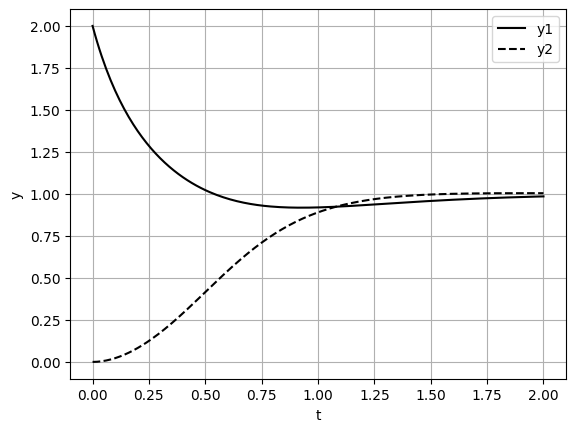

In [9]:
h = 0.01
ti = 0. ; tf = 2.
tspan = [0.,2.]
y0 = np.array([2.,0.])
t,y = rk4sys(dydtsys,tspan,y0,h)
import pylab
pylab.plot(t,y[:,0],c='k',label='y1')
pylab.plot(t,y[:,1],c='k',ls='--',label='y2')
pylab.grid()
pylab.xlabel('t')
pylab.ylabel('y')
pylab.legend()